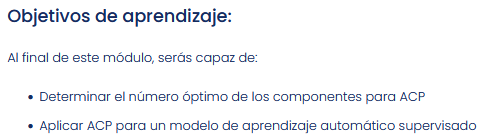

##**ACP para el aprendizaje automático supervisado**

ACP por sí mismo es una tarea de aprendizaje automático no supervisado. Sin embargo, se suele utilizar junto con un modelo de aprendizaje automático supervisado para reducir las dimensiones utilizadas en el algoritmo y, por lo tanto, mejorar la velocidad.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [5]:
# Get data
df = pd.read_csv('/content/drive/MyDrive/Data CodingDojo/wisconsinBreastCancer.csv', index_col = 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Prepara el conjunto de datos para el aprendizaje automático 

In [6]:
# Drop unnecessary column
df.drop(columns = 'Unnamed: 32', inplace = True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']

In [7]:
X.shape

(569, 30)

Ten en cuenta que este conjunto de datos tiene 30 columnas/dimensiones. Si bien esto no es mucho, podemos utilizar ACP para reducir ese número a medida que siga reteniendo información de todas las columnas.

**Escala los datos**

Los datos siempre deberían ser escalados antes de aplicar ACP.  El ACP es un algoritmo basado en la distancia.

In [8]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

**Ajusta ACP**

In [9]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

El ACP por defecto devolvera el mismo numero de componentes principales como el numero original de caracteristicas. Estos componentes explicaran el 100% de la varianza, aunque no sean lo mismo que las caracteristicas originales. Sin embargo, al usar tantos componentes principales como el numero de caracteristicas originales no sirve para reducir el proposito de la reduccion de dimensionalidad. Puesto que nuestro objetivo es reducir el numero de caracteristicas, debemos estar dispuestos a eliminar cierta informacion. El objetivo es encontrar el balance adecuado donde reducimos el numero de caracteristicas y mantenemos una alta proporcion suficiente de la varianza explicada.


#**Eleccion del numero de componentes a devolver**

Elegir mas componentes principales siempre aumentara la cantidad acumulada de la varianza explicada por los componentes.(Entre mas componentes principales, mas informacion estamos conservando).

Podemos visualizar la varianza acumulada explicada al devolver mas componentes con el siguiente codigo.

Text(0.5, 1.0, 'El aumento de los componentes incrementa la varianza acumulada explicada')

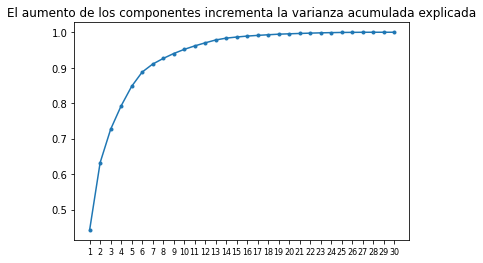

In [11]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 31), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,31), fontsize=8);
plt.title("El aumento de los componentes incrementa la varianza acumulada explicada")

El gráfico anterior muestra la varianza acumulada explicada a medida que aumenta el número de componentes principales devueltos.  Como puedes ver, existen aumentos drásticos en la proporción de una varianza explicada al principio, pero esto comienza a nivelarse a medida que vamos añadiendo más componentes. El primer componente principal siempre explicará la mayor parte de la varianza. Los componentes sucesivos seguirán explicando más, pero para reducir el número de características, necesitamos estar dispuestos a sacrificar parte de esta explicación.

#Visualización del gráfico de sedimentación

Podemos visualizar le contribución individual de cada componente principal utilizando un gráfico de sedimentación (scree plot):

Text(0, 0.5, 'Proportion of Explained Variance')

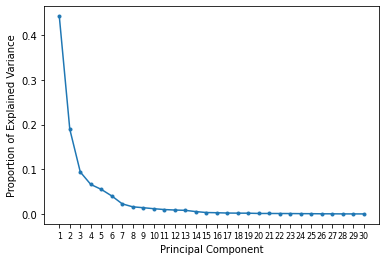

In [12]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 31), pca.explained_variance_ratio_, marker = '.')
plt.xticks(ticks = range(1, 31), fontsize=8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

Un gráfico de sedimentación transmite la misma información que un gráfico acumulado, pero hace un seguimiento de la contribución de cada componente por separado.  Como pueden observar, el primer componente explica la proporción más grande de la varianza, y cada componente adicional contribuye cada vez menos.  Aunque este gráfico está disminuyendo, recuerda que al aumentar el número de los componentes siempre disminuye la varianza (acumulada) explicada en total.

**Método del codo**

Según el gráfico de arriba, ¿cuántos componentes principales deberíamos mantener? En el “codo” o el punto de inflexión en el gráfico anterior se pueden ver alrededor de 7 componentes principales.  Aquí es donde no conseguimos muchas ventajas más allá de aumentar el número de componentes, por lo que representa un buen balance. 

El código de abajo muestra cómo especificar el número de componentes para devolver cuando se instancia ACP:

In [13]:
# PCA with 7 components
pca7 = PCA(n_components=7)

**Especificar la varianza explicada**

En lugar de especificar el número de componentes para devolver, un método alternativo es especificar la porción mínima de la varianza explicada que estás dispuesto a aceptar. El ACP automáticamente reducirá el número de componentes lo suficiente para cumplir tu especificación.  

Para especificar la porción de varianza, hay que darle al argumento n_components un número flotante entre 0 y 1, y este devolverá el número de componentes requeridos para explicar la varianza dada. 

El código de abajo es un ejemplo de cómo garantizar que los componentes suficientes se devuelvan para explicar el 85 % de la varianza:

In [14]:
# PCA with 85% explained variance
pca85 = PCA(n_components=.85)

**Ejemplo de ACP con aprendizaje supervisado**

Ahora utilizaremos los componentes principales para crear un modelo de regresión logística para predecir células malignas.

Divide los datos en conjuntos de entrenamiento y de prueba

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

Crea un pipeline ACP con Standard Scaler

El ACP funciona bien en un pipeline para simplificar nuestro código y evitar una fuga de datos.  Siempre recuerda escalar los datos de aplicar ACP.

In [18]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

Pon el pipeline ACP en otro pipeline con una regresión logística 

In [19]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

Evalua el modelo

In [20]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9812206572769953
Testing accuracy: 0.972027972027972


Resumen

Si bien ACP es, en sí mismo, una técnica de modelado no supervisada se puede utilizar para preparar datos para un modelado previsto al reducir el número de características.  Se puede utilizar en un pipeline junto con otros transformadores y modelos.  El ACP puede acelerar el tiempo de entrenamiento, y a veces mejorará las predicciones.  Los datos siempre se deberían escalar antes de aplicar ACP o cualquier otro modelo basado en distancia.  Un gráfico de sedimentación se puede utilizar para obtener una pista sobre cuál puede ser el número óptimo de componentes, pero no siempre es definitivo.  